<a href="https://colab.research.google.com/github/aylaraff/DLWorkshop/blob/main/Assessment_1(Suhailah).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessment 1: Deep Learning

1) Answer all questions.
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc.
3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)
4) Upload the answer notebook to your github. 
5) Submit the assessment by sharing the link to your answer notebook. 





**QUESTION 1** 

One day while wandering around a clothing store at KL East Mall, you stumbled upon a person who is choosing a dress for Hari Raya. It turns out that the person is visually impaired and had a hard time distinguishing between an abaya and a kebaya. To help people with the similar situation, you then decided to develop an AI system to identify the type of clothes using a Convolutional Neural Networks (ConvNet). In order to train the network, you decide to use the Fashion MNIST dataset which is freely available on Pytorch.


a) Given the problem, what is the most appropriate loss function to use? Justify your answer. **[5 marks]**


<span style="color:blue">
    ANSWER: Huber Loss. Huber Loss is a combination of the mean squared error and the mean absolute error, but it only takes the benefits of them. The MSE works well with small errors that have minimal effect on the regression line but causes maximum errors that causes problems on the loss function in the case of outliers. Meanwhile, the MAE is the opposite of MSE, it is more robust in the case of outliers, but have maximum effect on the regression line for small difference. So, the Huber Loss takes the positive of MAE and MSE, which makes it works well with small errors and robust in the case of outliers.
     )</span>

b) Create and train a ConvNet corresponding to the following CNN architecture (with a modification of the final layer to address the number of classes). Please include **[10 marks]**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

    



![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)

In [1]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy
import random

from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchsummary import summary


###############################################
######## THE REST OF YOUR CODES HERE ##########
###############################################



In [2]:
import os

#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.Resize(32),
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 16


trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('trouser', 'dress', 'abaya', 'kebaya', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 't-shirt/top')

FashionMNIST_labels = ["trouser",      # index 0
                       "dress",        # index 1
                       "abaya",        # index 2 
                       "kebaya",       # index 3 
                       "coat",         # index 4
                       "sandal",       # index 5
                       "shirt",        # index 6 
                       "sneaker",      # index 7 
                       "bag",          # index 8 
                       "t-shirt/top"]  # index 9

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

60000
10000


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

60000
10000


In [6]:
#1. DEFINE THE CNN 
class myModel(nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #use the last number of the D, H and W
        self.fc2 = nn.Linear(120, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

model = myModel()

In [7]:
#######################
# DEFINE YOUR OWN MODEL

#model_ft = models.convnext_tiny(pretrained=True)
#num_ftrs = model_ft.classifier[2].in_features
# Here the size of each output sample is set to 10.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
#model_ft.classifier[2] = nn.Linear(num_ftrs, 2)

#######################

# 2. LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

myModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
)

In [8]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'cifar10_model_'+str(epoch)+'.pt')
            
    return model, history

In [9]:
# 4. Train the model for 10 epochs
 
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.7363, Accuracy: 72.9983%, 
		Validation : Loss : 0.4938, Accuracy: 81.6900%, Time: 31.8934s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.4345, Accuracy: 84.0683%, 
		Validation : Loss : 0.4379, Accuracy: 84.1300%, Time: 32.1632s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3758, Accuracy: 86.3250%, 
		Validation : Loss : 0.3913, Accuracy: 86.0600%, Time: 26.6160s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.3425, Accuracy: 87.5400%, 
		Validation : Loss : 0.3547, Accuracy: 87.2500%, Time: 27.1478s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.3205, Accuracy: 88.2567%, 
		Validation : Loss : 0.3395, Accuracy: 88.0500%, Time: 27.4993s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.3039, Accuracy: 88.7700%, 
		Validation : Loss : 0.3528, Accuracy: 87.4900%, Time: 26.7334s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.2878, Accuracy: 89.3133%, 
		Validation : Loss : 0.3295, Accuracy: 87.7900%, Time: 27.7314s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.2751, Accura

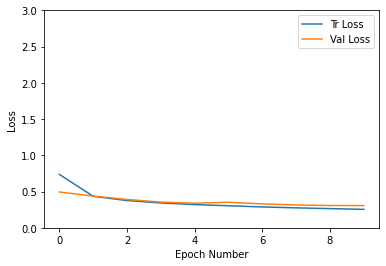

In [10]:
# 5. Analyze the loss curve

history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,3)
# plt.savefig('cifar10_loss_curve.png')
plt.show()

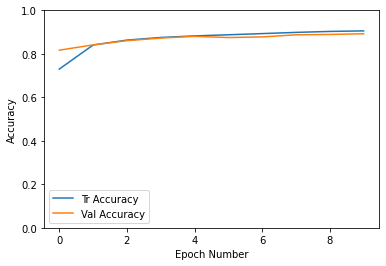

In [11]:
# 6. Analyze the accuracy curve

plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
# plt.savefig('cifar10_accuracy_curve.png')
plt.show()

In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
#         images = images.view(images.size(0), -1)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
#         images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 89 %
Accuracy for class: trouser is 82.3 %
Accuracy for class: dress is 98.3 %
Accuracy for class: abaya is 82.1 %
Accuracy for class: kebaya is 90.8 %
Accuracy for class: coat  is 90.9 %
Accuracy for class: sandal is 97.5 %
Accuracy for class: shirt is 63.1 %
Accuracy for class: sneaker is 96.9 %
Accuracy for class: bag   is 96.0 %
Accuracy for class: t-shirt/top is 94.6 %


c) Replace your defined CNN in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the Fashion MNIST dataset. **[10 marks]**

In [38]:
#Define Pre-trained Model: Resnet50

class FashionResnet(nn.Module):
  def __init__(self, in_channels=1):
    super(FashionResnet, self).__init__()

    self.model = models.resnet50(pretrained=True)
    self.model.conv1 = nn.Conv2d(in_channels, 64, kernel_size=5)

# Transfer learning and finetune model to fit the Fashion MNIST dataset.
    num_ftrs = self.model.fc.in_features
    self.model.fc = nn.Linear(num_ftrs, 10)

  def forward(self, x):
    return self.model(x)


my_resnet = FashionResnet()

In [39]:
#2. LOSS AND OPTIMIZER
criterion2 = nn.CrossEntropyLoss()
optimizer_my_resnet = optim.SGD(my_resnet.parameters(), lr=0.001)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
my_resnet.to(device)

FashionResnet(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256, ker

In [40]:
num_epochs = 10
trained_model, history = train_and_validate(my_resnet, criterion2, optimizer_my_resnet, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.6125, Accuracy: 79.0850%, 
		Validation : Loss : 0.3594, Accuracy: 86.8900%, Time: 175.2456s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.3497, Accuracy: 87.4500%, 
		Validation : Loss : 0.3098, Accuracy: 88.5500%, Time: 174.1916s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.2841, Accuracy: 89.7500%, 
		Validation : Loss : 0.2838, Accuracy: 89.5200%, Time: 173.4640s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.2401, Accuracy: 91.3533%, 
		Validation : Loss : 0.2663, Accuracy: 90.5300%, Time: 173.2950s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.2077, Accuracy: 92.5433%, 
		Validation : Loss : 0.2617, Accuracy: 90.6900%, Time: 173.3685s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1792, Accuracy: 93.4967%, 
		Validation : Loss : 0.2621, Accuracy: 90.8600%, Time: 174.1674s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1580, Accuracy: 94.3100%, 
		Validation : Loss : 0.2624, Accuracy: 91.2400%, Time: 175.1544s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1395,

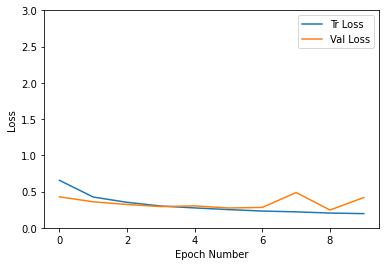

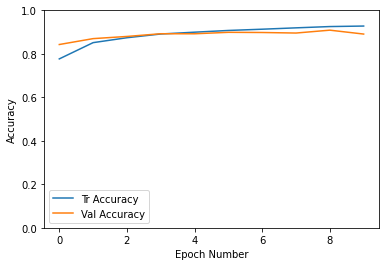

In [ ]:
#Plot
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.show()

plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [ ]:
#Check accuracy
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
#         images = images.view(images.size(0), -1)
        outputs = my_resnet(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
#         images = images.view(images.size(0), -1)
        outputs = my_resnet(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 89 %
Accuracy for class: trouser is 91.0 %
Accuracy for class: dress is 98.6 %
Accuracy for class: abaya is 92.0 %
Accuracy for class: kebaya is 90.3 %
Accuracy for class: coat  is 89.2 %
Accuracy for class: sandal is 87.7 %
Accuracy for class: shirt is 54.1 %
Accuracy for class: sneaker is 98.7 %
Accuracy for class: bag   is 98.6 %
Accuracy for class: t-shirt/top is 90.8 %


d) Using model-centric methods, propose two (2) strategies that can be used to increase the accuracy of the model on the testing dataset. **[5 marks]**


<span style="color:blue">
    Two model-centric techniques that I propose are: 1. Batch Normalization 
    2. Dropout </span>

e) Next, implement the two proposed model-centric techniques for the same problem as in the previous question. **[15 marks]**

In [31]:
#1. DEFINE THE CNN 
class myModel2(nn.Module):
    def __init__(self):
        super(myModel2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)
        self.dp = nn.Dropout(0.4)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #use the last number of the D, H and W
        self.fc2 = nn.Linear(120, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.bn1(self.pool(self.relu(self.conv1(x))))
        x = self.bn2(self.pool(self.relu(self.conv2(x))))
        x = x.view(-1, 16 * 5 * 5)
        x = self.dp(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x
    


In [32]:
model2 = myModel2()

# 2. LOSS AND OPTIMIZER
criterion3 = nn.CrossEntropyLoss()
optimizer_model2 = optim.Adam(model2.parameters(), lr=0.001)


# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model2.to(device)

myModel2(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dp): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
)

In [33]:
num_epochs = 10
trained_model, history = train_and_validate(model2, criterion3, optimizer_model2, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.4479, Accuracy: 83.8200%, 
		Validation : Loss : 0.3402, Accuracy: 87.5900%, Time: 31.1891s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.3430, Accuracy: 87.5333%, 
		Validation : Loss : 0.3065, Accuracy: 88.7900%, Time: 32.9995s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3115, Accuracy: 88.6083%, 
		Validation : Loss : 0.3048, Accuracy: 88.7800%, Time: 31.4324s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.2916, Accuracy: 89.2933%, 
		Validation : Loss : 0.2852, Accuracy: 89.1600%, Time: 31.1868s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.2762, Accuracy: 89.8967%, 
		Validation : Loss : 0.2810, Accuracy: 89.7500%, Time: 31.1762s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.2641, Accuracy: 90.0633%, 
		Validation : Loss : 0.2786, Accuracy: 89.7800%, Time: 30.8605s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.2532, Accuracy: 90.7100%, 
		Validation : Loss : 0.2714, Accuracy: 90.3600%, Time: 31.7857s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.2440, Accura

f) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **[5 marks]**

<span style="color:blue"> Yes, the accuracy has increased about 2%.
    <br>Batch normalization sets the learning rates high which speeds up the training process. The mean and variance for every mini batch becomes flexible, thus increasing the accuracy.
    <br>Dropout reduces overfitting by blocking off a fraction of neurons in a layer during training. With that, accuracy increases. </br>
    Your answer here </span>

g) In real applications, data-centric strategies are essential to train robust deep learning models. Give two (2) examples of such strategies and discuss how the strategies helps improving the model accuracy. **[5 marks]**

<span style="color:blue">
    1. Data Augmentation: transforms the images such as cropping, rotating and more. It artificially increases the amount of data by generating new data points from the existing data.
2. Data MixUp: combines different features of data from different classes. This is to train the model to learn more and able to think complex. </span>

h) Next, implement the two proposed data-centric techniques for the same problem as in the previous question. **[10 marks]**

In [34]:
#ii. Data Augmentation: image transforms

transform = transforms.Compose([transforms.RandomRotation(degrees=15),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transforms)
train_loader = DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transforms)
test_loader = DataLoader(testset, batch_size=16, shuffle=True)

# classes of fashion mnist dataset
classes = ['trouser', 'dress', 'abaya', 'kebaya', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 't-shirt/top']

train_data_size = len(train_loader.dataset)
test_data_size = len(test_loader.dataset)

print(train_data_size)
print(test_data_size)

60000
10000


In [35]:
#1. DEFINE THE CNN 
class myModel3(nn.Module):
    def __init__(self):
        super(myModel3, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)
        self.dp = nn.Dropout(0.4)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #use the last number of the D, H and W
        self.fc2 = nn.Linear(120, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.bn1(self.pool(self.relu(self.conv1(x))))
        x = self.bn2(self.pool(self.relu(self.conv2(x))))
        x = x.view(-1, 16 * 5 * 5)
        x = self.dp(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x
    


In [36]:
model3 = myModel3()

# 2. LOSS AND OPTIMIZER
criterion4 = nn.CrossEntropyLoss()
optimizer3 = optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model3.to(device)

myModel3(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dp): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
)

In [37]:
num_epochs = 10
trained_model, history = train_and_validate(model3, criterion4, optimizer3, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.5589, Accuracy: 80.3050%, 
		Validation : Loss : 0.3836, Accuracy: 85.8400%, Time: 27.6020s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.3664, Accuracy: 86.7867%, 
		Validation : Loss : 0.3360, Accuracy: 87.7900%, Time: 27.3379s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3262, Accuracy: 88.3000%, 
		Validation : Loss : 0.3146, Accuracy: 88.3600%, Time: 27.2709s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.3041, Accuracy: 89.0083%, 
		Validation : Loss : 0.3036, Accuracy: 89.1400%, Time: 27.3545s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.2897, Accuracy: 89.3767%, 
		Validation : Loss : 0.2849, Accuracy: 89.4600%, Time: 27.6855s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.2777, Accuracy: 89.9383%, 
		Validation : Loss : 0.2928, Accuracy: 89.1200%, Time: 27.4527s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.2650, Accuracy: 90.2783%, 
		Validation : Loss : 0.2788, Accuracy: 89.9600%, Time: 27.3377s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.2550, Accura

**QUESTION 2** **[35 marks]**

Firstly, watch this video:

https://drive.google.com/file/d/1bsypahR7I3f_R3DXkfw_tf0BrbCHxE_O/view?usp=sharing

This video shows an example of masked face recognition where the deep learning model is able to detect and classify your face even when wearing a face mask. Using the end-to-end object detection pipeline that you have learned, develop your own masked face recognition such that the model should recognize your face even on face mask while recognize other persons as "others".

Deliverables for this question are:

- the model file. Change the name to <your_name>.pt file (e.g. hasan.pt).
- a short video (~10 secs) containing your face and your friends faces (for inference).

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 13478, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 13478 (delta 203), reused 259 (delta 187), pack-reused 13198
Receiving objects: 100% (13478/13478), 13.24 MiB | 9.24 MiB/s, done.
Resolving deltas: 100% (9267/9267), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 49.6 MB/s 
     |████████████████████████████████| 145 kB 33.2 MB/s 
     |████████████████████████████████| 178 kB 54.5 MB/s 
     |████████████████████████████████| 1.1 MB 57.9 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 138 kB 68.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0NxYdkulfbTY0mv14omV")
project = rf.workspace("face-segmentation").project("face-detection-vup0q")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Face-Detection-2 in yolov5pytorch:: 100%|██████████| 232/232 [00:00<00:00, 1798.50it/s]


In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Face-Detection-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Face-Detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/datasets/Face-Detection-1/test/images/WIN_20221007_15_57_32_Pro_jpg.rf.11762805aea8498c5dcf451811337b29.jpg: 416x416 1 Suhailah, 8.2ms
image 2/5 /content/datasets/Face-Detection-1/test/images/maksssksksss655_png.rf.7624946d33491dd785f1101554cc5208.jpg: 416x416 1 Others, 8.3ms
image 3/5 /content/datas

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")